In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt 
import sklearn

2025-05-19 15:47:49.311079: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-19 15:47:49.315074: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-19 15:47:49.327479: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747687669.348330    4964 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747687669.354634    4964 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1747687669.371378    4964 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [2]:
from keras.api.models import Sequential
from keras.api.layers import Flatten, Dense, Conv2D, MaxPooling2D
from keras.api.utils import to_categorical

Haciendo un ejemplo de clasificación

In [3]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [4]:
x, y = make_blobs(n_samples = 1000, centers = 2, cluster_std = 3, random_state =42)

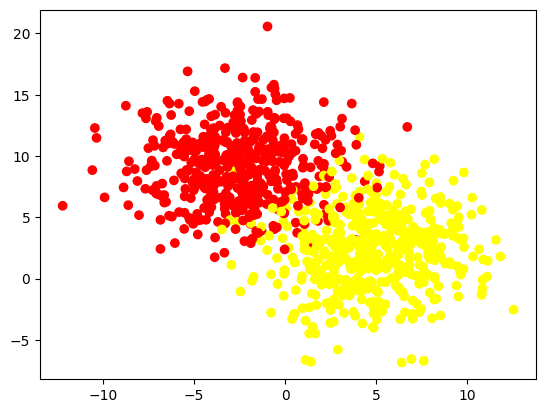

In [5]:
plt.scatter(x[:,0],x[:,1], c = y, cmap = "autumn")

In [6]:
le = LabelEncoder()
y = le.fit_transform(y)
y = to_categorical(y, num_classes = 2)

In [7]:
x_train, x_test ,y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [8]:
x_train = x_train.reshape(x_train.shape[0], 1, 2, 1).astype("float32")
x_test = x_test.reshape(x_test.shape[0], 1, 2, 1).astype("float32")

In [9]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(1, 1), activation='relu', input_shape=(1, 2, 1)))
model.add(MaxPooling2D(pool_size=(1, 1)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))

model.add(Dense(2, activation='softmax'))

/home/fisica6/anaconda3/envs/Dewin_Soto/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-05-19 15:47:53.193477: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2025-05-19 15:47:53.193533: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:178] verbose logging is disabled. Rerun with verbose logging (usually --v=1 or --vmodule=cuda_diagnostics=1) to get more diagnostic output from this module
2025-05-19 15:47:53.193546: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:183] retrieving CUDA diagnostic information for host: fisica6-iMac
2025-05-19 15:47:5

In [10]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
model.fit(x_train, y_train, epochs=28)

Epoch 1/28
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8637 - loss: 0.3427   
Epoch 2/28
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9445 - loss: 0.1456 
Epoch 3/28
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9422 - loss: 0.1699 
Epoch 4/28
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9291 - loss: 0.1734 
Epoch 5/28
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9438 - loss: 0.1579 
Epoch 6/28
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9356 - loss: 0.1655 
Epoch 7/28
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9423 - loss: 0.1451 
Epoch 8/28
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9498 - loss: 0.1344 
Epoch 9/28
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9502 - loss: 0.1401 
Epoch 10/28
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9304 - loss: 0.1866 
Epoch 11/28
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9509 - loss: 0.1363 
Epoch 12/28
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy

In [12]:
loss, accuracy = model.evaluate(x_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9583 - loss: 0.0881  


In [13]:
loss, accuracy

(0.08479565382003784, 0.9549999833106995)

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [15]:
y_pred_pro = model.predict(x_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


In [16]:
y_pred = [np.argmax(x) for x in y_pred_pro]
y_test = [np.argmax(x) for x in y_test]

In [17]:
matrix = confusion_matrix(y_test, y_pred)

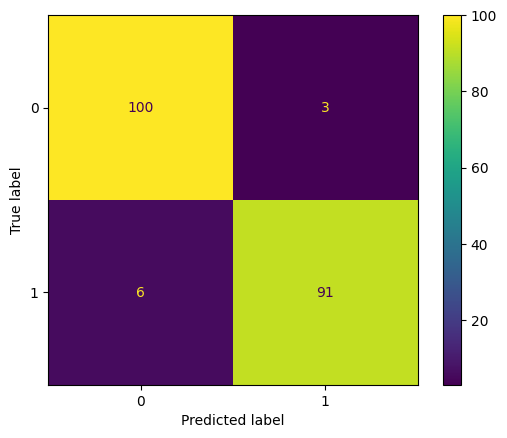

In [18]:
ConfusionMatrixDisplay(matrix).plot()
plt.show()